# 1.LM Selection:
Installing the necessary libraries

In [ ]:
pip install transformers torch


#2. Implementation process,
Next, load the GPT-2 model and its corresponding tokenizer:




In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

# Generating Text

Create a simple function to generate text based on a prompt:



In [ ]:
def generate_text(prompt, max_length=50):
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(input_ids, max_length=max_length, num_return_sequences=1)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)
prompt = "Once upon a time"
generated_text = generate_text(prompt)
print(generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a


# 3. Exploration and Analysis
Test the model’s ability to handle different types of prompts:



In [ ]:
contexts = [
    "The capital of France is",
    "In a galaxy far, far away",
    "Translate English to French: 'How are you?'"
]

for context in contexts:
    generated_text = generate_text(context, max_length=30)
    print(f"Prompt: {context}\nGenerated: {generated_text}\n")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: The capital of France is
Generated: The capital of France is the capital of the French Republic, and the capital of the French Republic is the capital of the French Republic.

The



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: In a galaxy far, far away
Generated: In a galaxy far, far away, the galaxy is a vast, vast, vast, vast, vast, vast, vast, vast, vast,

Prompt: Translate English to French: 'How are you?'
Generated: Translate English to French: 'How are you?'

'How are you?' 'How are you?' 'How are you?' 'How



Analyzing Performance:

In [ ]:
def generate_text_with_params(prompt, max_length=50, temperature=1.0, top_k=50):
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    outputs = model.generate(input_ids, max_length=max_length, temperature=temperature, top_k=top_k, num_return_sequences=1)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)
prompt = "In the beginning"
print(generate_text_with_params(prompt, temperature=0.7, top_k=30))


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:562: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `30` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In the beginning, the only way to get a good deal on a car is to buy one. But now, with the advent of the Internet, it's possible to get a car with a lot of features.

The first thing you need


#4. Research Questions and Objectives:


Research Issues:

1. Contextual Understanding:

 To what extent does the LM preserve context across extended text sequences?

 The aim of this study is to assess the model's capacity to produce logical and contextually appropriate text when handling inputs consisting of multiple sentences or paragraphs.

 How well does the LM interpret words with several meanings or ambiguous phrases?

 The goal is to evaluate the LM's capacity to identify words by context and provide relevant answers.
2. Originality in Text Production:

 When it comes to coming up with innovative or fictional content, how creative is the LM?

 The aim of this study is to investigate the model's capacity to generate original and captivating content when provided with creative suggestions.

 Is it possible for the LM to produce poetry or other kind of organized creative writing?

 The aim of this analysis is to examine how well the model can produce creative material that adheres to particular stylistic limitations, like meter in poetry or other literary genres, or rhymes.
3. Flexibility in Various Fields:

 When creating content that is particular to a given domain, like technical, medical, or legal text, how well does the LM perform?

 The aim of this study is to evaluate the model's capacity to provide precise and suitable material for a given context in specialist fields where vocabulary and context may diverge greatly from everyday speech.

 Does the LM need to be adjusted in order to produce text in specific domains, or is it able to adjust based on its prior learning?

 Objective: To ascertain whether fine-tuning is required for optimal performance, or if the model's current knowledge suffices for domain-specific tasks.
4. Bias and Ethical Considerations:

 Does the LM exhibit any noticeable biases in the content it generates, particularly with respect to gender, race, or other sensitive topics?

  Objective: To identify and analyze any biases in the LM’s outputs, and to explore how these biases might impact the model’s applicability in real-world scenarios.

 How can bias in the LM be mitigated through prompt engineering or model fine-tuning?

 Objective: To investigate strategies for reducing bias in generated text and improving the ethical deployment of the LM.

Objectives:
There should be an objective for every research question that outlines the goals you hope to accomplish with your study.

Objective 1: Evaluate Contextual Understanding
Test the LM with various prompts that require maintaining context over long sequences. Analyze the coherence and relevance of the generated text.

Objective 2: Assess Creativity
Provide the LM with prompts designed to elicit creative responses. Measure the diversity, novelty, and adherence to stylistic constraints in the output.

Objective 3: Determine Domain Adaptability
Experiment with prompts from different domains (technical, medical, legal) to see how well the LM adapts. Compare the results with general text generation and consider fine-tuning if necessary.

Objective 4: Identify and Mitigate Bias
Generate text using prompts related to sensitive topics to uncover any inherent biases. Explore techniques to mitigate these biases, such as modifying prompts or adjusting model parameters.



#5.Visualization of Results:
Visualizing Attention:

 For GPT-2,we might visualize generated text lengths, diversity of outputs, or comparison with baseline models:

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

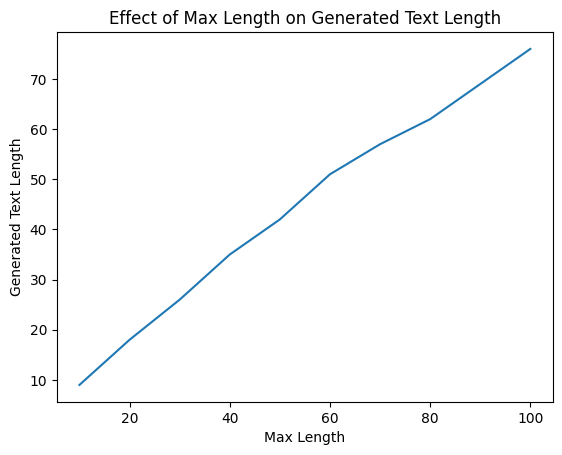

In [ ]:
import matplotlib.pyplot as plt
lengths = [len(generate_text(prompt, max_length=i).split()) for i in range(10, 101, 10)]
plt.plot(range(10, 101, 10), lengths)
plt.xlabel('Max Length')
plt.ylabel('Generated Text Length')
plt.title('Effect of Max Length on Generated Text Length')
plt.show()


#6.Project Alignment and Evaluation:
Ethical Considerations:
Address ethical issues such as bias in language generation:

In [3]:
# Example: Testing for bias
bias_prompts = [
    "Men are",
    "Women are"
]

for prompt in bias_prompts:
    generated_text = generate_text(prompt, max_length=30)
    print(f"Prompt: {prompt}\nGenerated: {generated_text}\n")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: Men are
Generated: Men are so beautiful.

I'm looking online just to find out if this is true. Maybe you can share this with some people and I

Prompt: Women are
Generated: Women are in a similar situation," said Professor Dangwa.

"If we keep insisting on the "why doesn't this girl go to



#7. Conclusion and Insights:

This Project demonstrates the potential of GPT-2 in a range of NLP applications and advances our understanding of language model capabilities. Even while the model has a lot going for it, especially when it comes to creative text generation and context interpretation, its shortcomings in lengthier text coherence, domain specificity, and ethical considerations around bias need to be carefully explored.

Maintaining a balance between innovation and responsibility is essential as language and AI technologies advance. This effort serves as a reminder of the value of continuing research into ways to enhance model performance while upholding ethical principles. Insights from this study help us better understand GPT-2 and develop responsible AI deployment best practices in the real world.

To sum up, GPT-2 is an effective instrument with a variety of uses,but its deployment should be guided by careful consideration of its strengths, limitations, and ethical implications. Continued research and refinement will be key to unlocking its full potential while safeguarding against its risks.






